<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-in-Python" data-toc-modified-id="Clustering-in-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Clustering in Python</strong></a></span><ul class="toc-item"><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>K-Means Clustering</strong></a></span><ul class="toc-item"><li><span><a href="#How-it-works:" data-toc-modified-id="How-it-works:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>How it works:</a></span></li><li><span><a href="#Pros-and-Cons:" data-toc-modified-id="Pros-and-Cons:-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Pros and Cons:</a></span></li></ul></li><li><span><a href="#Implementing-K-Means" data-toc-modified-id="Implementing-K-Means-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Implementing K-Means</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hierarchical Clustering</a></span><ul class="toc-item"><li><span><a href="#How-it-works:" data-toc-modified-id="How-it-works:-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>How it works:</a></span></li><li><span><a href="#Pros-and-Cons:" data-toc-modified-id="Pros-and-Cons:-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Pros and Cons:</a></span></li></ul></li><li><span><a href="#Implementing-Heirarchical-Clustering" data-toc-modified-id="Implementing-Heirarchical-Clustering-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Implementing Heirarchical Clustering</a></span></li><li><span><a href="#Determining-the-Number-of-Clusters" data-toc-modified-id="Determining-the-Number-of-Clusters-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Determining the Number of Clusters</a></span><ul class="toc-item"><li><span><a href="#Elbow-Method" data-toc-modified-id="Elbow-Method-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Elbow Method</a></span></li><li><span><a href="#Silhouette-Method" data-toc-modified-id="Silhouette-Method-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Silhouette Method</a></span></li></ul></li><li><span><a href="#Graphically-Evaluating-the-Clusters" data-toc-modified-id="Graphically-Evaluating-the-Clusters-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Graphically Evaluating the Clusters</a></span></li><li><span><a href="#Things-to-consider" data-toc-modified-id="Things-to-consider-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Things to consider</a></span></li><li><span><a href="#Other-Clustering-Techniques" data-toc-modified-id="Other-Clustering-Techniques-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Other Clustering Techniques</a></span></li><li><span><a href="#More-Resources" data-toc-modified-id="More-Resources-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>More Resources</a></span></li></ul></li></ul></div>

# **Clustering in Python**

In this notebook you can find examples and discussion of k-means and hierarchical clustering in python. These techniques are typically used for unsupervised learning problems where we are trying to identify clusters and/or groups of observations in a dataset that are more similar to each other within group then between groups. Along with the basics of k-means and hierarchical clustering I will discuss some metrics and/or methods that can be used to evaluate the validity of the clusters. 

Example Use Cases:
* Cluster Documents
* Identify Crime Locality
* Fraud Detection
* Market Segmentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

For this tutorial I will be using the iris data set. This dataset contains 150 observations from three iris species (50 of each class). The features include the petal width and length and the sepal width and length. 

**Note:** As mentioned clustering is typically used for unsupervised problems. The main reason for using the iris dataset is to have a comparison point to see how well the algorithms work. 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris_df['target_recode'] = iris_df['target'].apply(lambda x: 'setsoa' if x == 0 else('versicolor' if x == 1.0 else 'virginica'))

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_recode
0,5.1,3.5,1.4,0.2,0.0,setsoa
1,4.9,3.0,1.4,0.2,0.0,setsoa
2,4.7,3.2,1.3,0.2,0.0,setsoa
3,4.6,3.1,1.5,0.2,0.0,setsoa
4,5.0,3.6,1.4,0.2,0.0,setsoa


Just to get a general sense of what this data looks like and how the species are organized in the feature space lets take a look at some basic plots

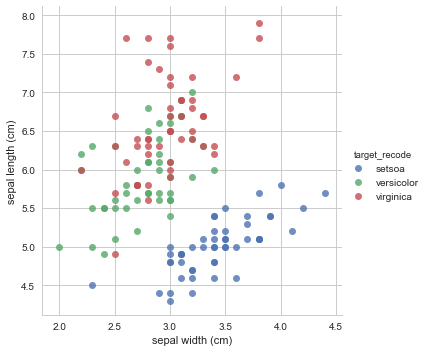

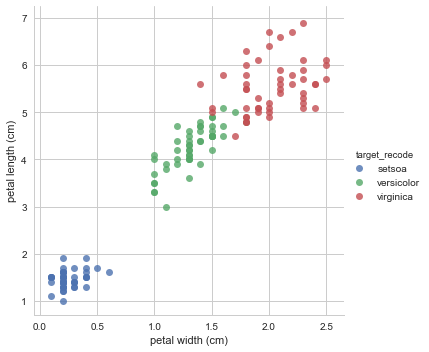

In [3]:
%matplotlib inline

sns.lmplot(x = "sepal width (cm)", y = "sepal length (cm)", hue = 'target_recode',
           data = iris_df, fit_reg=False)

sns.lmplot(x = "petal width (cm)", y = "petal length (cm)", hue = 'target_recode', 
           data = iris_df, fit_reg=False)


## **K-Means Clustering**

### How it works:

**Main idea is to define a set of spherical clusters with the smallest possible within cluster variation.**

<img src="files/k_means_minfunc.png">

**The Algorithm**
* Decide if need to scale the features
    * Example case of grouping shoppers? Some items may be purchased more frequently then others and therefore unfairly weight the dissimilarity between shoppers (i.e. socks versus computers). Scaling weights all the features equally.
* Assign a number from 1 to k. k being the number of clusters that you would like the algorithm to find in the dataset.
* First step randomly initialize the k centroids in the feature space
* Iterative Steps
    * Calculate the distance from each observation to each centroid
    * Assign the observations to the closest centroid
    * Move centroid based on average of the features of the observations assigned to it and move centroid to this spot
* Stop once the centroid stops shifting


<img src="files/k_means_alg.png">



### Pros and Cons:

**Pros:**
* Fast and robust
* Fairly easy to understand
* Gives best results when the data are well separated

**Cons:**
* Have to define the number of clusters beforehand
* Uses exclusive assignment. Could have overlapping data but it will always assign to only one cluster
* Euclidean distance measures can unequally weight underlying factors and can only use euclidean distance.


## Implementing K-Means

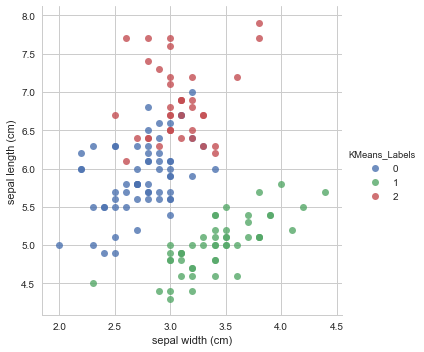

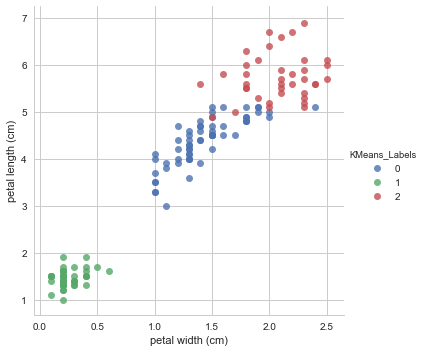

In [20]:
from sklearn.cluster import KMeans

obs_fts = iris_df.loc[:,["sepal width (cm)","sepal length (cm)", "petal width (cm)", "petal length (cm)"]]

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(obs_fts)

iris_df['KMeans_Labels'] = kmeans.labels_
sns.lmplot(x = "sepal width (cm)", y = "sepal length (cm)", hue = 'KMeans_Labels', 
           data = iris_df, fit_reg=False)
sns.lmplot(x = "petal width (cm)", y = "petal length (cm)", hue = 'KMeans_Labels', 
           data = iris_df, fit_reg=False)


## Hierarchical Clustering

**Main idea is to start with all nodes as single clusters and then progressively merge clusters together to form a hierarchy**

### How it works:

**The Algorithm:**
* Select distance metric
    * Euclidean, gowers (mix of categorical and continuous), correlation
* Decide if the features should be scaled (partially based on distance metric that you are going to use)
* Select linkage type
    * Single - two most similar parts of the cluster
    * Complete - two least similar parts of the cluster
    * Average - from center of the clusters (most often used and typically the most stable)
* Iterative Steps
    * Starts by treating each observation as an individual cluster
    * Identify the two clusters that are closest together and merge them
    * Continue until all clusters are merged together



<img src="hierarchical_clustering.png">

<img src="hierarchical_clustering_dendogram.png">

<img src="Linkage_Table.png">

<img src="hierarchical_clustering_linkmethods.png">


### Pros and Cons:

**Pros:**
* Can use different metrics for defining distance 
* Works best when data have underlying hierarchy
* Produces an easily interpretable dendogram
    
**Cons:**
* Typically slower then k-means clustering
* Have to figure out how many clusters you have
* Because it is a greedy algorithm (i.e. finding best step at each cluster fusion as opposed to global view like k-means) could end up getting suboptimal performance

**Extra note:**
Hierarchical clustering is typically known as an agglomerative clustering method. In theory it can also be done by first grouping all observations in a single cluster and then iteratively splitting up the clusters. This is known as divisive clustering (e.g. community detection analysis using the edge-betweeness algorithm).

## Implementing Heirarchical Clustering

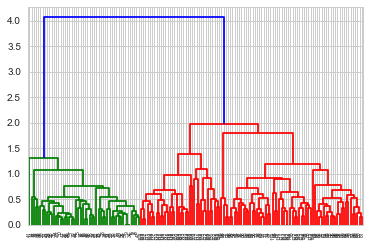

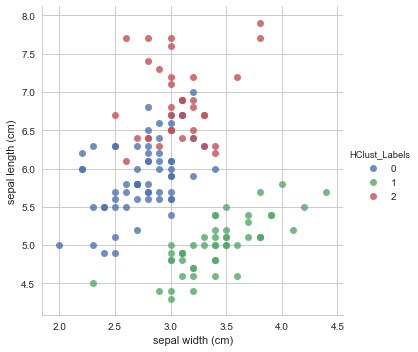

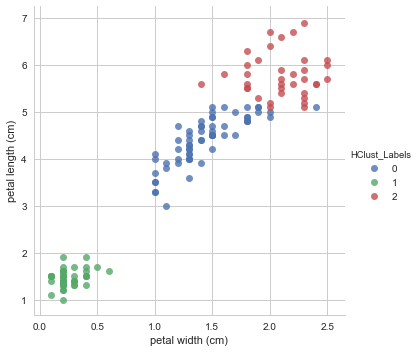

In [5]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#SKLearn
# create clusters
h_clust = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
hc_labels = h_clust.fit_predict(obs_fts)

#Scipy
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(obs_fts, method='average'))

iris_df['HClust_Labels'] = hc_labels
sns.lmplot(x = "sepal width (cm)", y = "sepal length (cm)", hue = 'HClust_Labels', 
           data = iris_df, fit_reg=False)
sns.lmplot(x = "petal width (cm)", y = "petal length (cm)", hue = 'HClust_Labels', 
           data = iris_df, fit_reg=False)

## Determining the Number of Clusters

### Elbow Method

Looks at the total within cluster variance or percent variance explained at each value of k. There really isn't any mathmatical formulation to determin the precise point (elbow), it is more subjective in looking for the plateau point in the total within cluster variance or the percent variance explained.

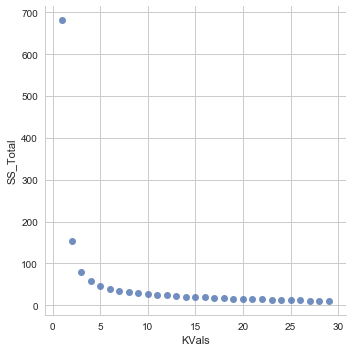

In [6]:
#Generate a list of values for k to take
k_vals = range(1, 30)
#Create a list of KMeans models
kmeans = [KMeans(n_clusters=i) for i in k_vals]
#Get the total variance at each value of k
ss_total = [kmeans[i].fit(obs_fts).inertia_ for i in range(len(kmeans))]

k_ss = pd.DataFrame({"KVals": k_vals, "SS_Total": ss_total})
sns.lmplot(x = "KVals", y = "SS_Total", data = k_ss, fit_reg = False)

### Silhouette Method

The silhouette value provides a measure for how similar an object is to its own cluster compared to the other clusters. It can range from 1 (matched well to its cluster) to -1 (not well matched). Ideally want to have a silhouette score for all observations (i.e. means that all observations are clustered appropriatly). 

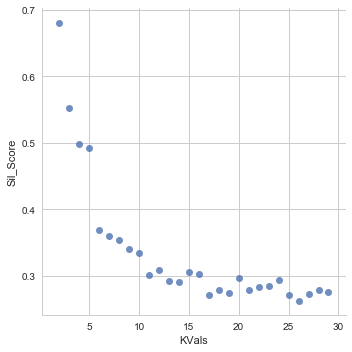

In [7]:
from sklearn.metrics import silhouette_score

#Loop through a range of kvalues and and get the silhoutte scores
k_vals = range(2, 30)
sil_scores = np.array([])
for num_clusts in k_vals:
    kmeans = KMeans(n_clusters = num_clusts, random_state = 0)
    kmeans.fit(obs_fts)
    #Get average silhouette score
    sil_scores = np.append(sil_scores, silhouette_score(obs_fts, kmeans.labels_))
    
k_sil = pd.DataFrame({"KVals": k_vals, "Sil_Score": sil_scores})
sns.lmplot(x = "KVals", y = "Sil_Score", data = k_sil, fit_reg = False)

For n_clusters = 2 The average silhouette_score is : 0.680813620294


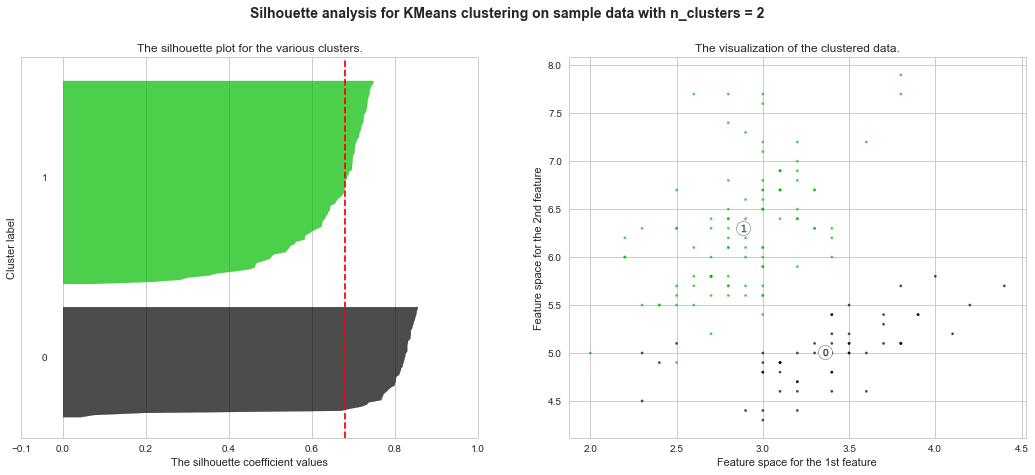

For n_clusters = 3 The average silhouette_score is : 0.55259194455


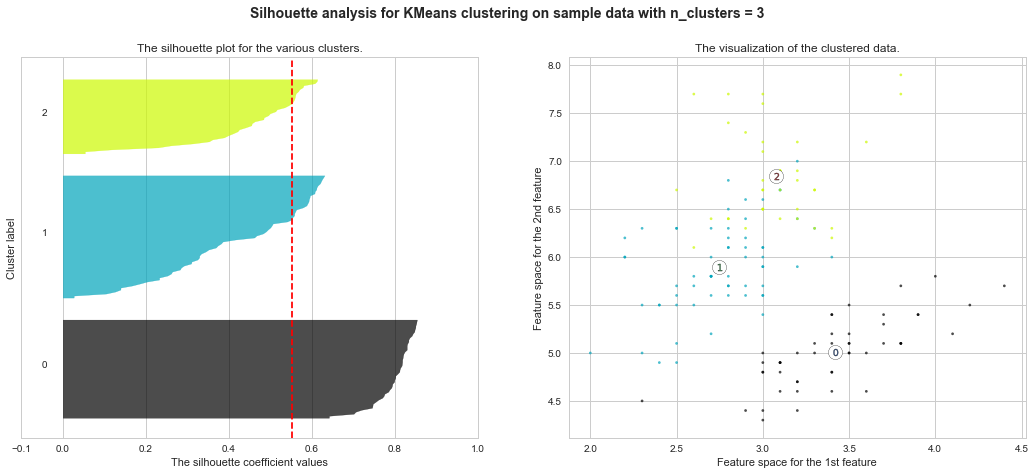

For n_clusters = 4 The average silhouette_score is : 0.49782569011


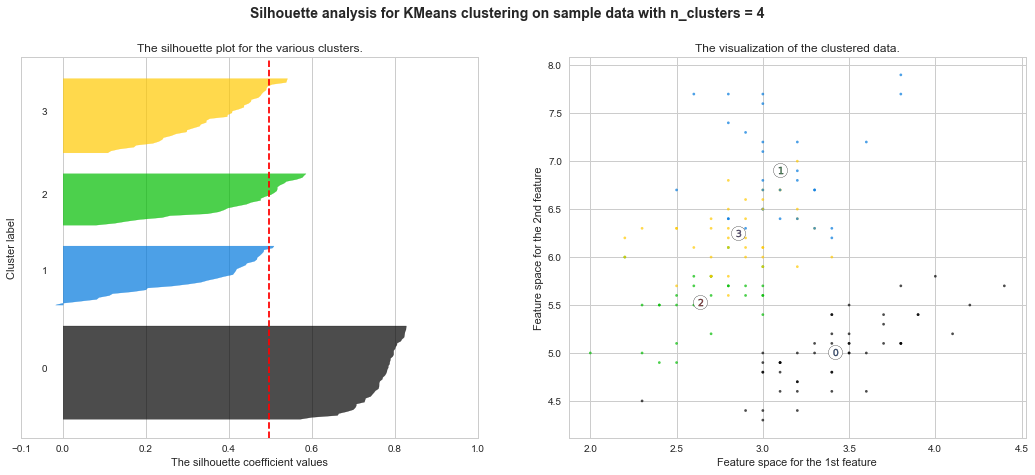

For n_clusters = 5 The average silhouette_score is : 0.488517550889


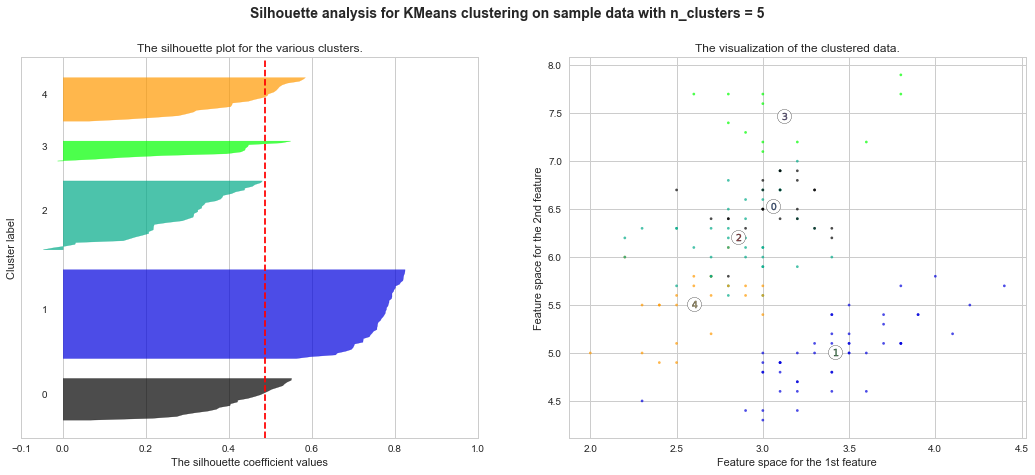

For n_clusters = 6 The average silhouette_score is : 0.371218050546


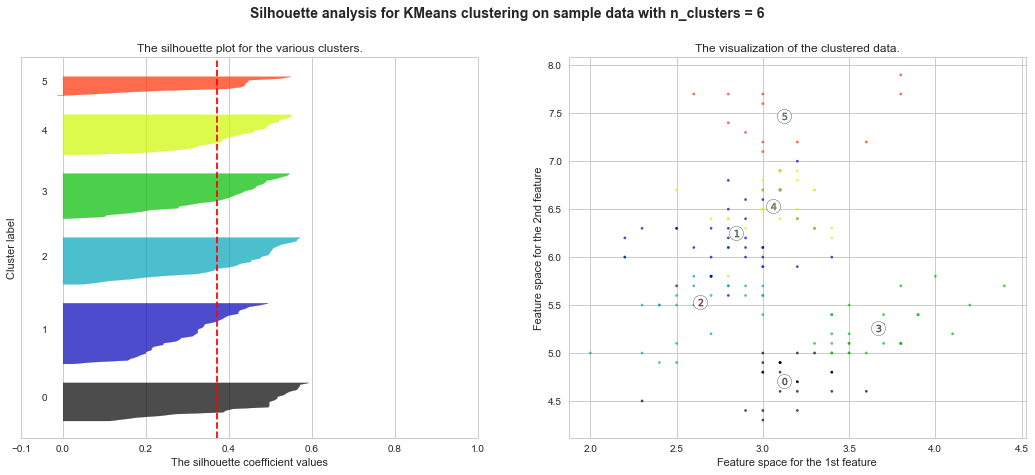

In [8]:
#SKLearn Info: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples

import matplotlib.pyplot as plt
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(obs_fts) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(obs_fts)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(obs_fts, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(obs_fts, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(obs_fts.iloc[:, 0], obs_fts.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Graphically Evaluating the Clusters

/Users/jonlandrigan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


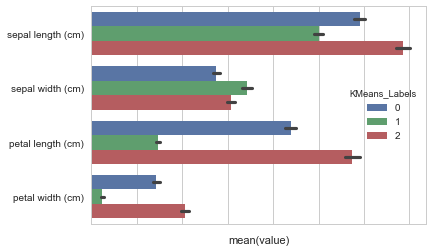

In [9]:
dflong = pd.melt(iris_df, id_vars = ['target', 'target_recode','HClust_Labels', 'KMeans_Labels'], 
                  var_name = 'Feature')

featureBars = sns.barplot(x = 'value', y = 'Feature', hue = 'KMeans_Labels', data = dflong)
featureBars.set_xticklabels(featureBars.get_xticklabels(),rotation=90)
featureBars.set_ylabel("")

/Users/jonlandrigan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


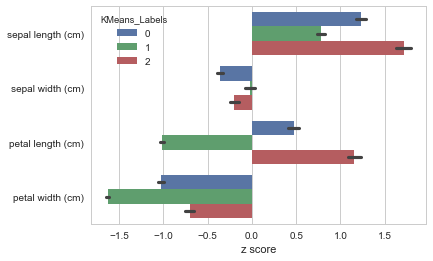

In [16]:
col_mean = dflong["value"].mean()
col_sd = dflong["value"].std(ddof=0)
dflong["value_scaled"] = dflong["value"].apply(lambda x: (x-col_mean)/col_sd)
scaled_plt = sns.barplot(x = "value_scaled", y = "Feature", hue = 'KMeans_Labels', data = dflong)
scaled_plt.set_ylabel("")
scaled_plt.set_xlabel("z score")

<img src="States_Cluster_Plot.png">
<img src="States_Dendogram.png">

## Things to consider

* The distance metric used and/or the approach used can have big consequences on the final result so pick carefully!
* Both K Means and Hierarchical Clustering force observations into single clusters and therefore the results could be distorted in the presence of outliers. In this case mixture models may be a more appropriate tool to use. 
* Clustering algorthims are not that robust to perterbations in the data (i.e. removing a subset of the sample).
* Always keep in mind how you will validate the clusters in the end to prove you are not just clustering noise in the data!!!! There are differenct techniques to do this but no fully agreed upon best method.
    * Internal: 
        * Explained Variance
        * Silhouette Method 
        * Dunn Index (ratio between the smallest distance between observations not in the same cluster to the largest intra-cluster distance) 
    * External: Corrected 
        * Rand Index - provides a measure for assessing the similarity between two partitions, adjusted for chance. Its range is -1 (no agreement) to 1 (perfect agreement) 
        * Variation of Information - a measure of the distance between two clusterings (partitions of elements). It is closely related to mutual information. It should be minimized.

## Other Clustering Techniques

* Community Detection Analysis
* Fuzzy Clustering
* Spectral Clustering
* Guassian Mixtures

## More Resources
* https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097
* https://towardsdatascience.com/how-to-cluster-your-customer-data-with-r-code-examples-6c7e4aa6c5b1
* http://www-bcf.usc.edu/~gareth/ISL/
* http://scikit-learn.org/stable/modules/clustering.html
* https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/